In [ ]:
import numpy as np
import random
import matplotlib.pyplot as plt
import math

In [ ]:
np.random.seed(15)
bandit_means = np.random.uniform(0,1,10)

maxBandit = 0
for j in range(10):
  if maxBandit < bandit_means[j]:
    maxBandit = bandit_means[j]

print(bandit_means)
print(maxBandit)

maxBandit = np.ones(100000) * maxBandit

[0.8488177  0.17889592 0.05436321 0.36153845 0.27540093 0.53000022
 0.30591892 0.30447436 0.11174128 0.24989901]
0.8488176972685787


# et-G3

#  1) Applying epsilon - greedy 3 algorithm , GLIEfying it








i) E = 1/(t+1)











In [ ]:
T = 100000
wins = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
win = 0
max = 0
winarray = np.zeros(T)
Trials = np.ones(10)

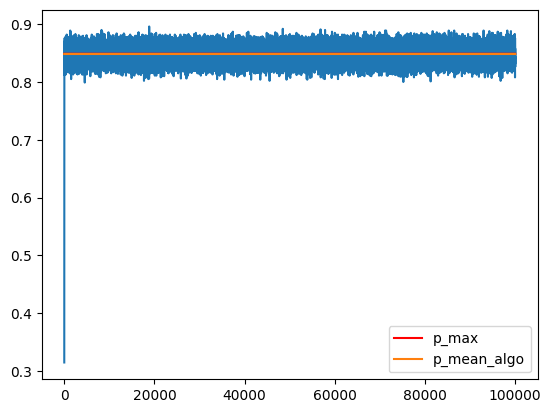

In [ ]:
eg3_mean=0
for z in range(1000):
  index = random.randint(0,9)
  num = random.random()
  Trials[index] = Trials[index] + 1
  if num <= bandit_means[index]:
    wins[index] = wins[index] + 1
    win = win + 1
    winarray[0] = winarray[0]+1

  for i in range(T):
    if i == 0:
      continue
    numT = random.random()
    epsilon = 1/(i+1)

    # Exploration
    if numT < epsilon:
      index = random.randint(0,9)
      num = random.random()
      Trials[index] = Trials[index] + 1
      if num <= bandit_means[index]:
        wins[index] = wins[index] + 1
        win = win + 1
        winarray[i] = winarray[i]+1

    # Exploitation
    elif numT >= epsilon:
      max = 0
      index = -1
      probab = wins/Trials
      for j in range(10):
        if max <= probab[j]:
          max = probab[j]
          index = j
      num = random.random()
      Trials[index] = Trials[index] + 1
      if num <= bandit_means[index]:
        wins[index] = wins[index] + 1
        win = win + 1
        winarray[i] = winarray[i]+1
  eg3_mean = eg3_mean+win


eg3_mean/1000
winarray = winarray/1000
mn = sum(winarray)/len(winarray)
plt.plot(winarray)
plt.plot(maxBandit,label = "p_max",color = "r")
plt.plot([mn]*T,label = "p_mean_algo")
plt.legend()

regret would be equal to difference between pmax and probability of the algorithm which can be taken as equal to the avg of the graph we have obtained or the middle point of the graph multplied by the time horizon


ii) E= 1/(t+1)^2

In [ ]:
T = 100000
wins = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
win = 0
max = 0
winarray = np.zeros(T)
Trials = np.ones(10)

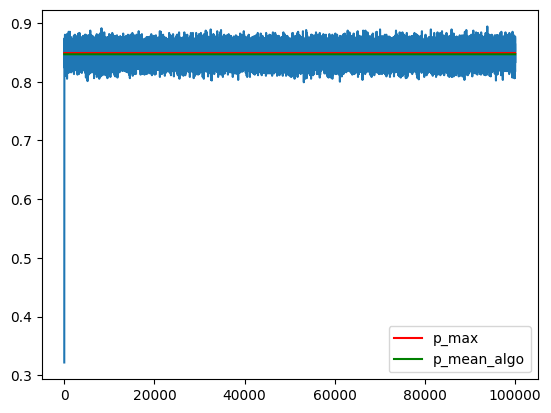

In [ ]:
eg3_mean=0
for z in range(1000):

  index = random.randint(0,9)
  num = random.random()
  Trials[index] = Trials[index] + 1
  if num <= bandit_means[index]:
    wins[index] = wins[index] + 1
    win = win + 1
    winarray[0] = winarray[0]+1
  for i in range(T):
    if i ==0:
      continue
    numT = random.random()
    epsilon = 1/((i+1)**2)

    # Exploration
    if numT <= epsilon:
      index = random.randint(0,9)
      num = random.random()
      Trials[index] = Trials[index] + 1
      if num <= bandit_means[index]:
        wins[index] = wins[index] + 1
        win = win + 1
        winarray[i] = winarray[i]+1

    # Exploitation
    elif numT > epsilon:
      max = 0
      index = -1
      probab = wins/Trials
      for j in range(10):
        if max <= probab[j]:
          max = probab[j]
          index = j
      num = random.random()
      Trials[index] = Trials[index] + 1
      if num <= bandit_means[index]:
        wins[index] = wins[index] + 1
        win = win + 1
        winarray[i] = winarray[i]+1
  eg3_mean = eg3_mean+win


eg3_mean/100
winarray = winarray/1000
mn = sum(winarray)/len(winarray)
plt.plot(winarray)
plt.plot(maxBandit,label = "p_max",color ="r")
plt.plot([mn]*T,label = "p_mean_algo",color="g")
plt.legend()

In [ ]:
mn = sum(winarray)/len(winarray)
mn

0.8481473900000296

# 2) Lai and Robbins lower bound

> We know that 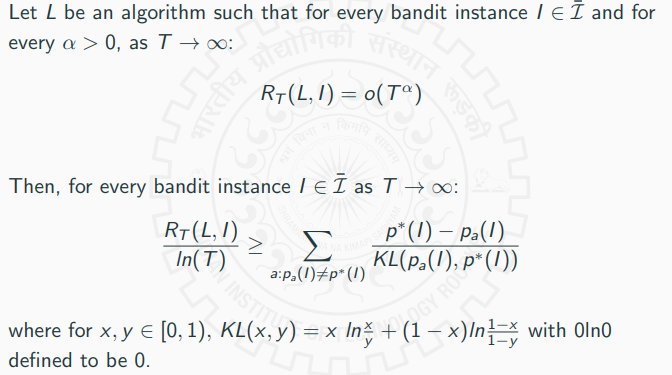



> Thus formula for the lower bound on regret is given by 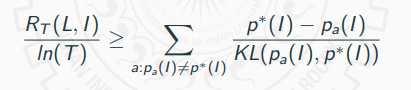





In [ ]:
def KL(pa,ps):
  ans = pa*math.log(pa/ps) + (1-pa)*math.log((1-pa)/(1-ps))
  return ans


In [ ]:
pa = bandit_means[0]
pa

0.8488176972685787

In [ ]:
p_sum = 0
for i in range(10):
  if i>0:
   p_sum = p_sum + ((pa-bandit_means[i])/(pa*math.log(pa/bandit_means[i]) + (1-pa)*math.log((1-pa)/(1-bandit_means[i]))))

In [ ]:
Regret_min = math.log(T)*(p_sum)

In [ ]:
Regret_min

82.15863368497384